In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression

In [3]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/aliccia/Desktop/Final Case


In [4]:
os.chdir("/Users/aliccia/Desktop/Final Case")

In [5]:
data = pd.read_csv("data_clean.csv")

In [6]:
def labe_count(data):
    data.groupby(by="label").count()["sampleid"]/data["sampleid"].count()
    (data.groupby(by="label").count()["sampleid"]/data["sampleid"].count()).plot(kind="bar")
def missing_rate(data):
    null=pd.DataFrame(data.isnull().sum()/data["current_sub_TF"].count(),columns=["col feature of missing ratio"])
    NULL=null.sort_values("col feature of missing ratio",ascending=False)
    return NULL
def plot(NULL):
        NULL["col feature of missing ratio"].plot.barh(figsize=[5,10],title="col feature of missing ratio")

In [7]:
missing_rate(data)

,col feature of missing ratio
cancel_date,0.866419
payment_type,0.742402
last_payment,0.363749
num_ideal_streaming_services,0.356967
num_weekly_services_utilized,0.355433
next_payment,0.353300
Unnamed: 0,0.000000
discount_price,0.000000
payment_period,0.000000
current_sub_TF,0.000000


In [8]:
data2= data.drop(data[(data["payment_period"]==0)&(data["current_sub_TF"]==True)&(data["cancel_date"].isnull()== True)].index)

In [9]:
data2['label'] = 0

In [10]:
data2.loc[ (data["payment_period"]==0),'label'] = 1
data2.loc[ (data["payment_period"]!=0)&(data["cancel_date"].isnull()== False),'label'] = 1

In [11]:
data2.groupby(data2["label"]).count()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,initial_credit_card_declined,join_fee,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
label,,,,,,,,,,,,,,,,,,,,,
0,86801,86801,86801,56306,86801,86801,86801,56199,86801,86801,...,86801,86801,22072,86801,86801,86801,86801,86295,0,86801
1,50832,50832,50832,32329,50832,50832,50832,32220,50832,50832,...,50832,50832,13171,50832,50832,50832,4473,655,19163,50832


In [12]:
data3=data2.drop(["subid","last_payment","next_payment",
           "account_creation_date","trial_end_date",
           "last_payment","next_payment","cancel_date","plan_type","num_weekly_services_utilized","num_ideal_streaming_services"],axis=1)

In [13]:
data4=pd.get_dummies(data = data3[["package_type","preferred_genre","intended_use",
      "male_TF","attribution_technical","attribution_survey",
     "op_sys","join_fee","payment_period","initial_credit_card_declined",
     "trial_completed"]])

In [14]:
label=data3.label

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [16]:
def plot_roc(fpr, tpr):
    plt.figure(figsize=[9,8])
    lw=2
    plt.plot(fpr,tpr,color="orange",lw=lw,label="ROC curve (area = %0.2f)"%roc_auc)
    plt.plot([0.0,1],[0,1],color="navy",lw=lw,linestyle="--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC")
    plt.legend(loc="lower right")
    plt.show()

In [21]:
feature_x = [tag for tag in data4.columns if tag not in ['label']]
x = data4[feature_x].values
y = data3['label']

In [22]:
LR=LogisticRegression(penalty='l2', C=1.0, fit_intercept=True,)
LR.fit(x,y)
print(classification_report(y,LR.predict(x)))

/Users/aliccia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     86801
           1       0.99      0.92      0.96     50832

    accuracy                           0.97    137633
   macro avg       0.97      0.96      0.97    137633
weighted avg       0.97      0.97      0.97    137633



Confusion matrix, without normalization
[[86486   315]
 [ 4008 46824]]


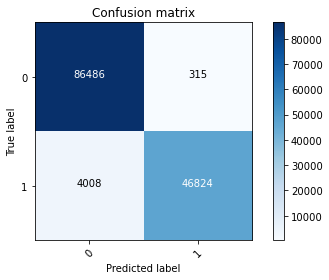

In [23]:
cm2=confusion_matrix(y,LR.predict(x))
plot_confusion_matrix(cm2,classes=[0,1])

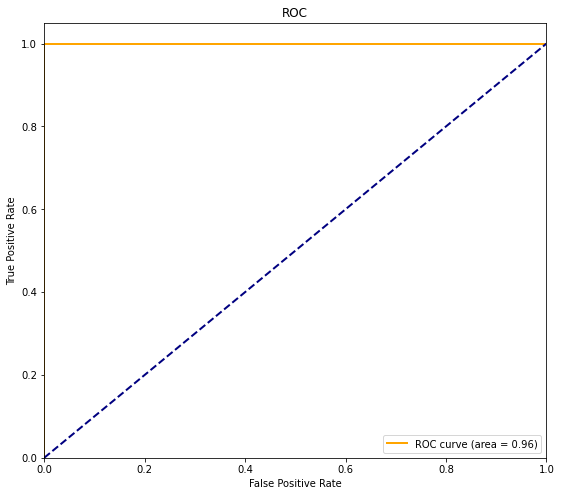

In [25]:
roc_auc=roc_auc_score(y,LR.predict(x))
y_score=LR.predict_proba(x)[:,1]
fpr2,tpr2,thresholds2=roc_curve(y,y)
plot_roc(fpr2,tpr2)

In [29]:
data4['prob']=y_score

In [30]:
data4.to_csv('problem3.csv')